In [2]:
import pandas as pd

In [24]:
df = pd.read_csv('Fremont_Bridge_Bicycle_Counter_20240716.csv', index_col ='Date', parse_dates=True)

C:\Users\alish\AppData\Local\Temp\ipykernel_10260\3922072062.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Fremont_Bridge_Bicycle_Counter_20240716.csv', index_col ='Date', parse_dates=True)


In [25]:
! head Fremont_Bridge_Bicycle_Counter_20240716.csv

Date,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
10/02/2012 01:00:00 PM,55,7,48
10/02/2012 02:00:00 PM,130,55,75
10/02/2012 03:00:00 PM,152,81,71
10/02/2012 04:00:00 PM,278,167,111
10/02/2012 05:00:00 PM,563,393,170
10/02/2012 06:00:00 PM,381,236,145
10/02/2012 07:00:00 PM,175,104,71
10/02/2012 08:00:00 PM,86,51,35
10/02/2012 09:00:00 PM,63,35,28


In [26]:
df.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


<Axes: xlabel='Date'>

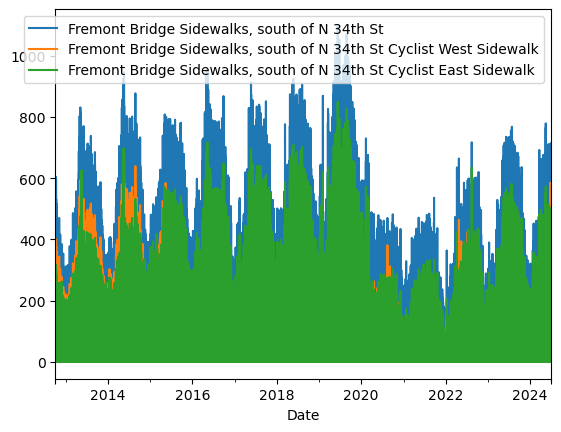

In [34]:
df.plot()

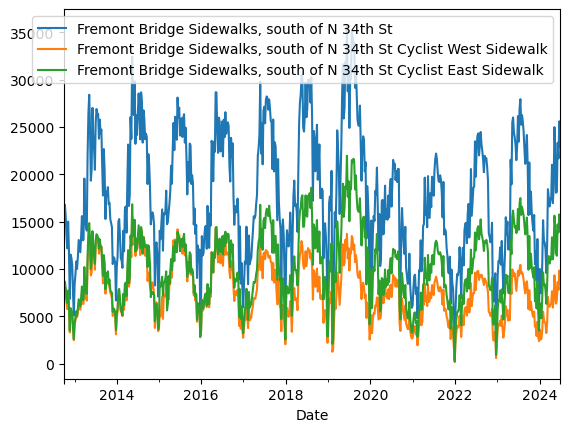

In [32]:
df.resample('W').sum().plot();

<Axes: xlabel='Date'>

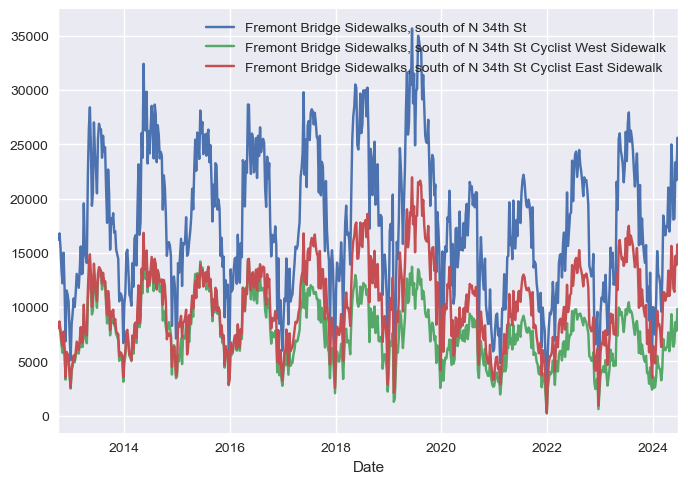

In [40]:
import matplotlib.pyplot as plt
df.resample('W').sum().plot()

(0.0, 2526742.55)

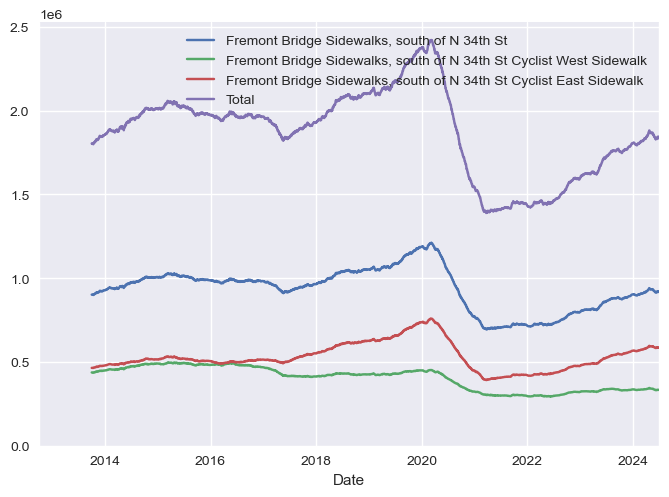

In [44]:
df['Total'] = df['Fremont Bridge Sidewalks, south of N 34th St'] + df['Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk'] + df['Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk']
ax = df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

<Axes: xlabel='time'>

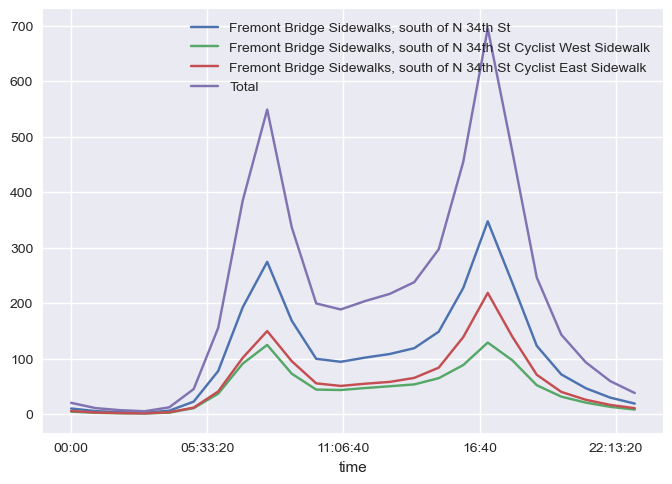

In [46]:
df.groupby(df.index.time).mean().plot()

In [48]:
pivoted = df.pivot_table('Total', index=df.index.time, columns=df.index.date)
pivoted.iloc[:5,:5]

,2012-10-02,2012-10-03,2012-10-04,2012-10-05,2012-10-06
00:00:00,NaN,26.0,36.0,22.0,30.0
01:00:00,NaN,20.0,6.0,16.0,30.0
02:00:00,NaN,4.0,18.0,14.0,18.0
03:00:00,NaN,10.0,6.0,8.0,6.0
04:00:00,NaN,14.0,16.0,18.0,10.0


<Axes: xlabel='time'>

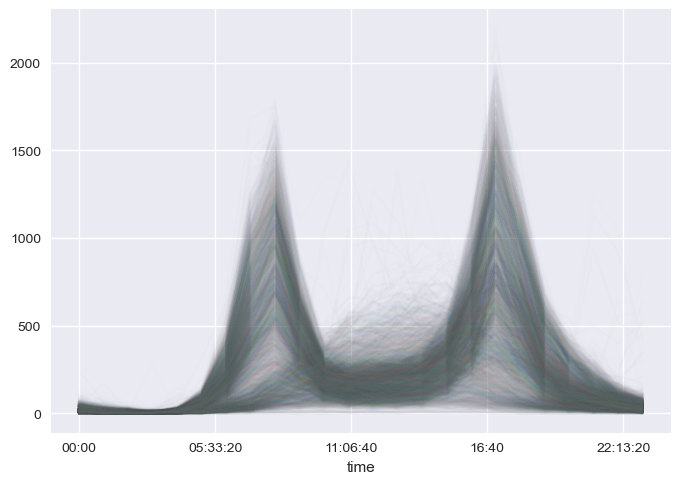

In [51]:
pivoted.plot(legend=False, alpha=0.01)